In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import mlxtend
import sklearn
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# https://drive.google.com/drive/folders/1EAqxx0Z7tjycnHTgwL8Tx3q4i5ngLHnm?usp=drive_link
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/Machine_learnnig_Tahlildadeh"

df = pd.read_csv(f'{data_path}/kaggle_survey_2022_responses.csv')
df.shape



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-60-d618fbd45020>:6: DtypeWarning: Columns (0,15,43,57,73,88,104,118,126,132,170,200,208,215,225,248,255,257,260,270,271,272,277,281,294) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f'{data_path}/kaggle_survey_2022_responses.csv')


(23998, 296)

In [61]:
df.head(10)

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
5,232,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
6,277,18-21,Woman,India,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...","YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
7,1550,18-21,Man,India,Yes,NaN,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
8,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,"Reddit (r/machinelearning, etc)",NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
9,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23998 entries, 0 to 23997
Columns: 296 entries, Duration (in seconds) to Q44_12
dtypes: object(296)
memory usage: 54.2+ MB


In [63]:
pd.value_counts(df['Q4'])


Q4
India                                                   8792
United States of America                                2920
Other                                                   1430
Brazil                                                   833
Nigeria                                                  731
Pakistan                                                 620
Japan                                                    556
China                                                    453
Egypt                                                    383
Mexico                                                   380
Indonesia                                                376
Turkey                                                   345
Russia                                                   324
South Korea                                              317
France                                                   262
United Kingdom of Great Britain and Northern Ireland     258
Canada               

In [64]:
cf = df[df['Q4'] == 'Iran, Islamic Republic of...']
cf.shape

(120, 296)

In [65]:
cf.head(5)

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
142,286,18-21,Man,"Iran, Islamic Republic of...",Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
331,920,35-39,Woman,"Iran, Islamic Republic of...",No,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...","YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
384,586,30-34,Woman,"Iran, Islamic Republic of...",No,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
425,964,25-29,Woman,"Iran, Islamic Republic of...",Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
448,14301,35-39,Man,"Iran, Islamic Republic of...",No,NaN,NaN,NaN,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN


In [66]:
cf.index

Index([  142,   331,   384,   425,   448,   594,   613,   745,   916,  1165,
       ...
       22002, 22110, 22302, 22921, 23178, 23179, 23357, 23601, 23615, 23812],
      dtype='int64', length=120)

In [67]:
cf.columns

Index(['Duration (in seconds)', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3',
       'Q6_4', 'Q6_5',
       ...
       'Q44_3', 'Q44_4', 'Q44_5', 'Q44_6', 'Q44_7', 'Q44_8', 'Q44_9', 'Q44_10',
       'Q44_11', 'Q44_12'],
      dtype='object', length=296)

In [68]:
#1 . Age Distribution: What is the distribution of age among the respondents?

Q2
25-29    30
30-34    25
22-24    23
18-21    16
35-39    14
40-44     8
45-49     2
50-54     1
55-59     1
Name: count, dtype: int64


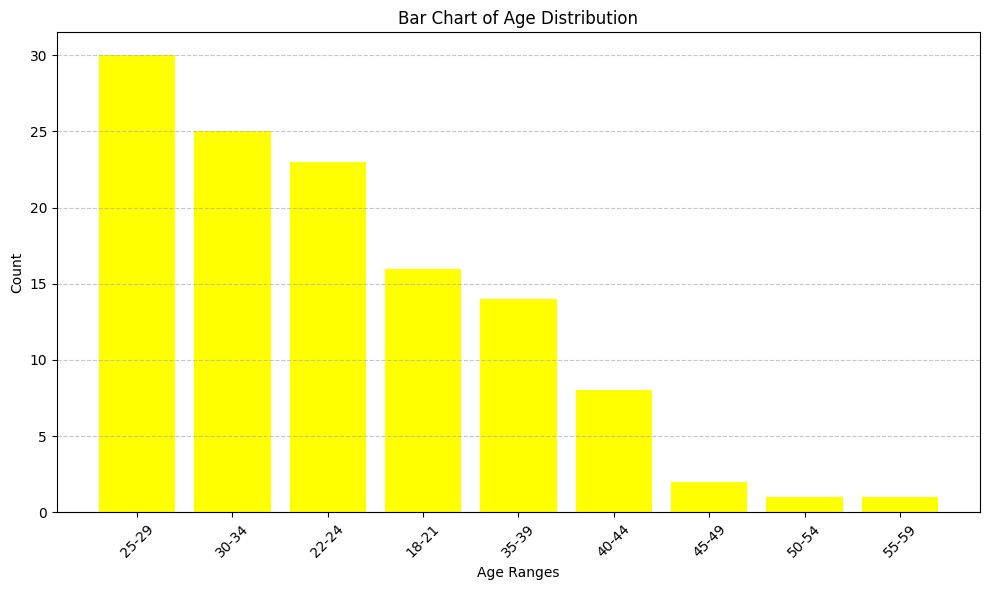

In [69]:
print(cf['Q2'].value_counts())
data = dict(cf['Q2'].value_counts())

# Extracting age ranges and counts
age_ranges = list(data.keys())
counts = list(data.values())

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(age_ranges, counts, color='yellow')
plt.xlabel('Age Ranges')
plt.ylabel('Count')
plt.title('Bar Chart of Age Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines on y-axis
plt.tight_layout()
plt.show()

In [70]:
 #2. What is the gender distribution among the respondents?

Q3
Man                  77
Woman                40
Prefer not to say     2
Nonbinary             1
Name: count, dtype: int64


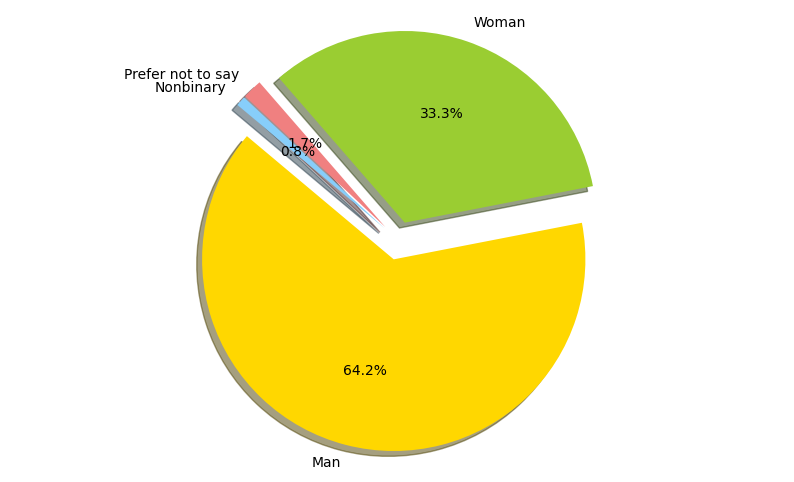

In [71]:
print(cf['Q3'].value_counts())
datag = dict(cf['Q3'].value_counts())


plt.figure(figsize=(10, 6))

# Define the data for the pie chart
counts = list(datag.values())
labels = list(datag.keys())
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode the 1st slice (i.e. 'A')

# Create the pie chart
plt.pie(counts, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.show()

In [72]:
# 3. Country Representation: Which countries have the highest number of respondents?

Q4
India                       8792
United States of America    2920
Other                       1430
Brazil                       833
Nigeria                      731
Pakistan                     620
Japan                        556
China                        453
Egypt                        383
Mexico                       380
Name: count, dtype: int64


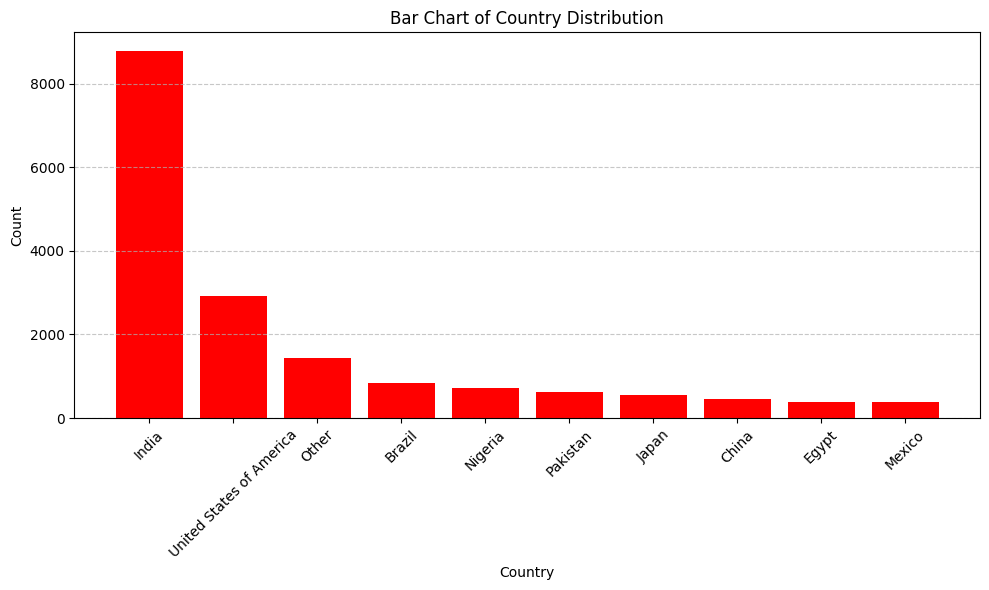

In [73]:
print(df['Q4'].value_counts().iloc[:10])
data = dict(df['Q4'].value_counts().iloc[:10])

# Extracting ranges and counts
country_ranges = pd.Series(data.keys())  #mohem %%%%%%%%%%%%%%%%%%%
counts = pd.Series(data.values())

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(country_ranges, counts, color='red')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Bar Chart of Country Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines on y-axis
plt.tight_layout()
plt.show()

In [74]:
#4. Student Status: What percentage of respondents are currently students?

Q5
No     12036
Yes    11960
Name: count, dtype: int64


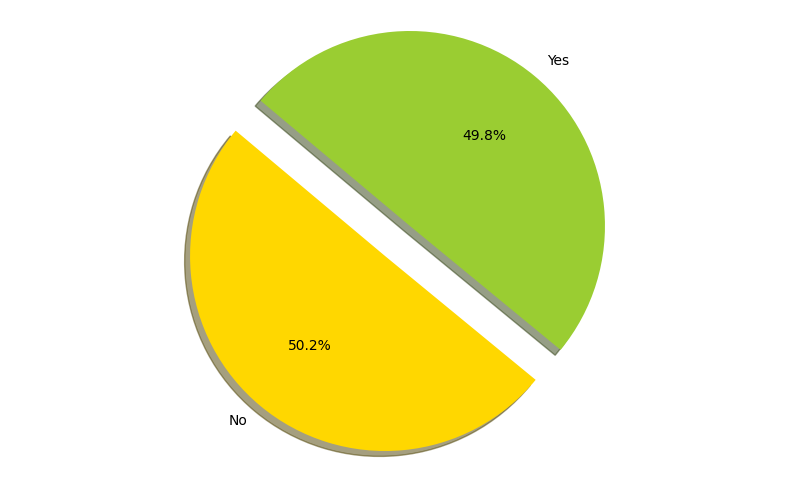

In [75]:
print(df[1:-1]['Q5'].value_counts())
datag = dict(df[1:-1]['Q5'].value_counts())

plt.figure(figsize=(10, 6))

# Define the data for the pie chart
counts = list(datag.values())
labels = list(datag.keys())
colors = ['gold', 'yellowgreen' ]
explode = (0.1, 0.1 )  # explode the 1st slice (i.e. 'A')

# Create the pie chart
plt.pie(counts, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.show()

In [76]:
# 5. Popular Learning Platforms: Which platforms are most commonly used by respondents for data science courses?

In [77]:
sf = df.iloc[1:, 5:17]
sf = sf.drop(sf.columns[10], axis=1)
print(sf.shape)

lst = []
for i in range(sf.shape[1]):
  lst.append(list(sf.iloc[:, i].value_counts().to_dict().values()))

m_var = lst.index(max(lst))
max_item = sf.iloc[:,m_var].value_counts()
print(max_item)



(23997, 11)
Q6_1
Coursera    9699
Name: count, dtype: int64


In [78]:
#6. Highest Level of Education: What is the highest level of formal education attained by the respondents?

Q8
Master’s degree                                                      9142
Bachelor’s degree                                                    7625
Doctoral degree                                                      2657
Some college/university study without earning a bachelor’s degree    1431
I prefer not to answer                                               1394
Professional doctorate                                                585
No formal education past high school                                  564
Name: count, dtype: int64


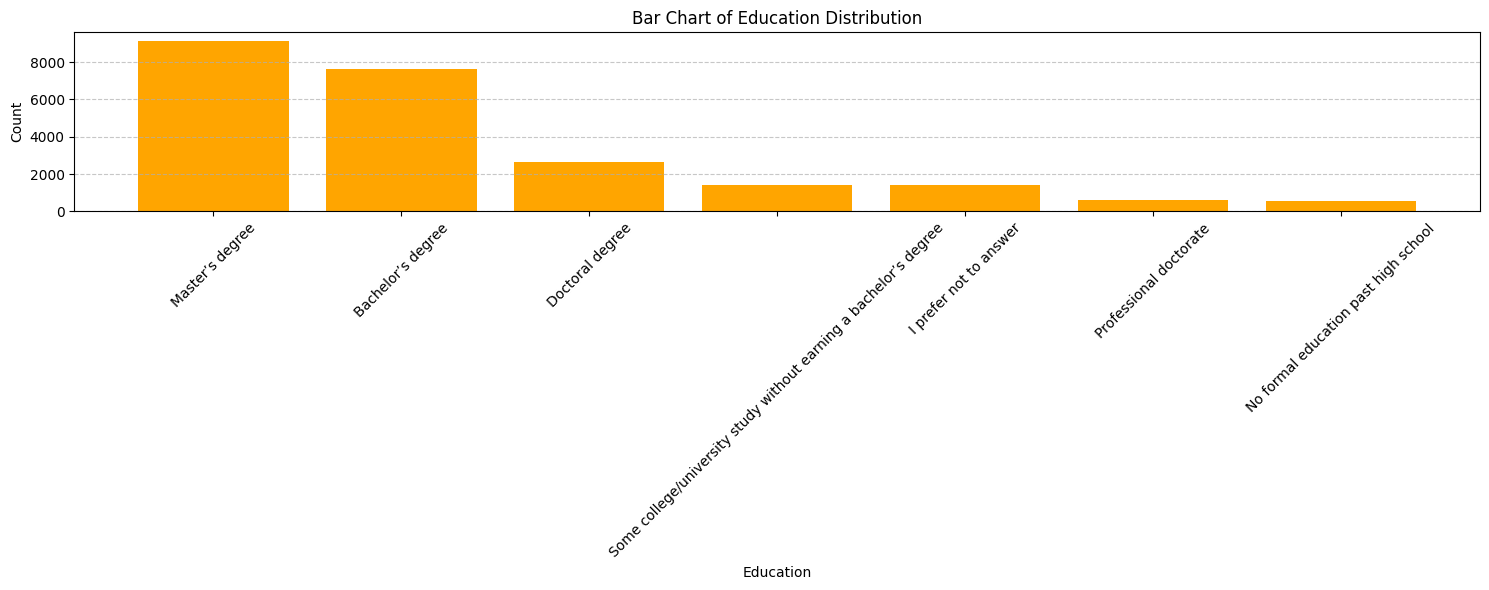

In [79]:
print(df['Q8'].iloc[1:].value_counts())
data = dict(df['Q8'].iloc[1:].value_counts())

# Extracting level and counts
education_ranges = pd.Series(data.keys())  #mohem %%%%%%%%%%%%%%%%%%% Baraye adame estefade az dictionary moghe plot keshidan.
counts = pd.Series(data.values())

# Plotting the bar chart
plt.figure(figsize=(15, 6))
plt.bar(education_ranges, counts, color='orange')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Bar Chart of Education Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines on y-axis
plt.tight_layout()
plt.show()

In [80]:
#7. Coding Experience: How many years have respondents been writing code or programming?

Q11
1-3 years                    6459
< 1 years                    5454
3-5 years                    3399
5-10 years                   2556
I have never written code    2037
10-20 years                  1801
20+ years                    1537
Name: count, dtype: int64


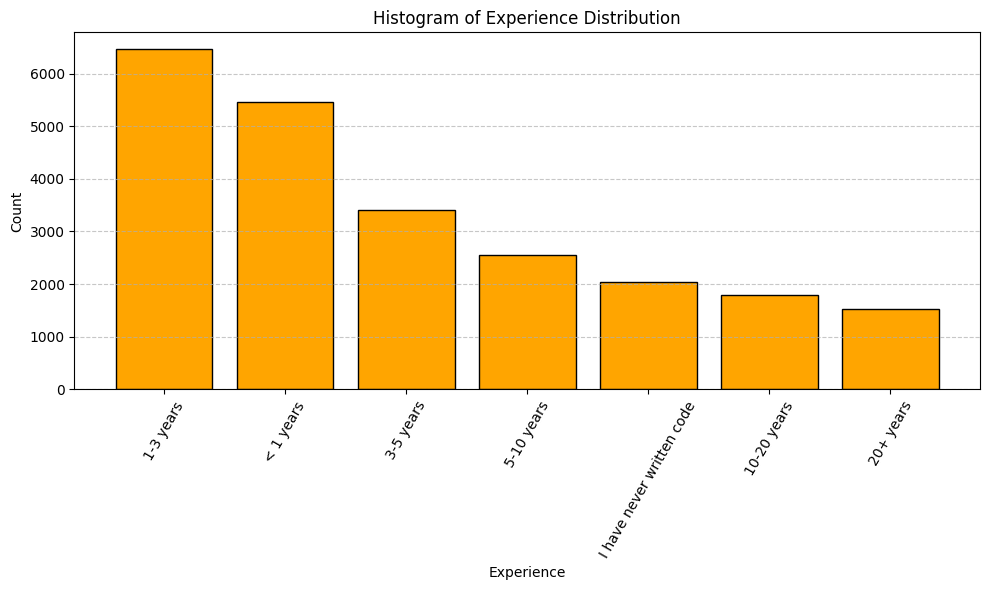

In [81]:
print(df['Q11'].iloc[1:].value_counts())
data = dict(df['Q11'].iloc[1:].value_counts())

# Extracting Experience and counts
Experience_ranges = pd.Series(data.keys())  #mohem %%%%%%%%%%%%%%%%%%%
counts = pd.Series(data.values())

# Calculate bin centers   # baraye tanzim kardan onvane har sotoon dar zire vasate on.
bin_edges = np.arange(len(Experience_ranges) + 1)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plotting the histogram chart
plt.figure(figsize=(10, 6))
plt.hist(bin_centers, bins=bin_edges, weights=counts, color='orange', edgecolor='black', rwidth=0.8)

# Setting x-ticks to bin centers and labels
plt.xticks(ticks=bin_centers, labels=Experience_ranges, rotation=60)

# Adding labels and title
plt.xlabel('Experience')
plt.ylabel('Count')
plt.title('Histogram of Experience Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [82]:
# 8. Programming Languages: Which programming languages are most commonly used by respondents?

(23997, 15)
Q12_1
Python    18653
Name: count, dtype: int64
Q12_2
R    4571
Name: count, dtype: int64
Q12_3
SQL    9620
Name: count, dtype: int64
Q12_4
C    3801
Name: count, dtype: int64
Q12_5
C#    1473
Name: count, dtype: int64
Q12_6
C++    4549
Name: count, dtype: int64
Q12_7
Java    3862
Name: count, dtype: int64
Q12_8
Javascript    3489
Name: count, dtype: int64
Q12_9
Bash    1674
Name: count, dtype: int64
Q12_10
PHP    1443
Name: count, dtype: int64
Q12_11
MATLAB    2441
Name: count, dtype: int64
Q12_12
Julia    296
Name: count, dtype: int64
Q12_13
Go    322
Name: count, dtype: int64
Series([], Name: count, dtype: int64)
Q12_15
Other    1342
Name: count, dtype: int64


 The programming languages are most commonly used : Q12_1
Python    18653
Name: count, dtype: int64


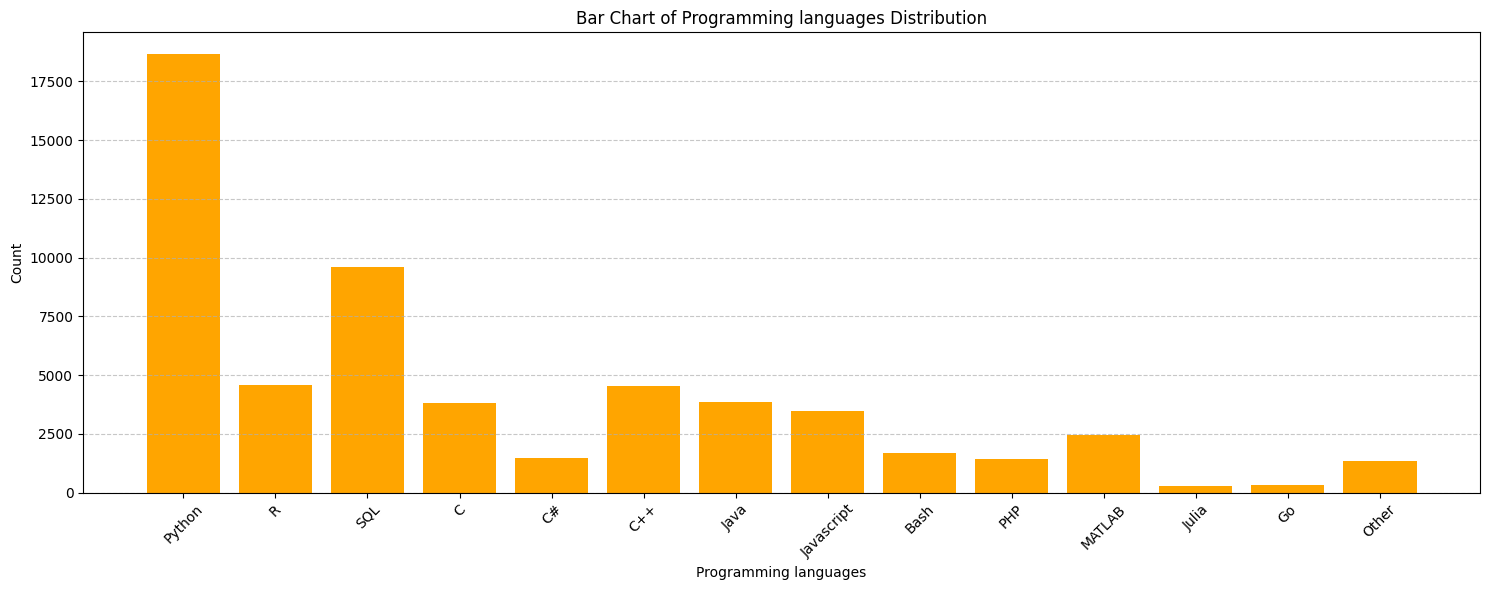

In [83]:
sf = df.iloc[1:, 30:45]
print(sf.shape)
sf.head(5)

for i in range(15):
  print(sf.iloc[:, i].value_counts())

lst1 = []
lst2 = []
for i in range(sf.shape[1]):
  lst1.append(list(sf.iloc[:, i].value_counts().to_dict().values()))
for j in range(sf.shape[1]):
  lst2.append(list(sf.iloc[:, j].value_counts().to_dict().keys()))



m_var = lst1.index(max(lst1))
max_item = sf.iloc[:,m_var].value_counts()


print('\n\n','The programming languages are most commonly used :', max_item)

# Extracting programming and counts

counts = [item for sublist in lst1 for item in sublist]
programming = [item for sublist in lst2 for item in sublist]


# Plotting the bar chart
plt.figure(figsize=(15, 6))
plt.bar(programming, counts, color='orange')
plt.xlabel('Programming languages')
plt.ylabel('Count')
plt.title('Bar Chart of Programming languages Distribution')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines on y-axis
plt.tight_layout()
plt.show()
